### EXPLORATORY DATA ANALYSIS

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/dataset.csv")

In [3]:
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [4]:
df.shape

(114000, 21)

In [5]:
df.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

In [6]:
df.dtypes

Unnamed: 0            int64
track_id             object
artists              object
album_name           object
track_name           object
popularity            int64
duration_ms           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre          object
dtype: object

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.isna().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [9]:
df[df.artists.isna()]

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,65900,1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,0,0,False,0.501,0.583,...,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


#### Explore target feature (Popularity)

In [11]:
df.popularity.describe()

count    113999.000000
mean         33.238827
std          22.304959
min           0.000000
25%          17.000000
50%          35.000000
75%          50.000000
max         100.000000
Name: popularity, dtype: float64

<Axes: >

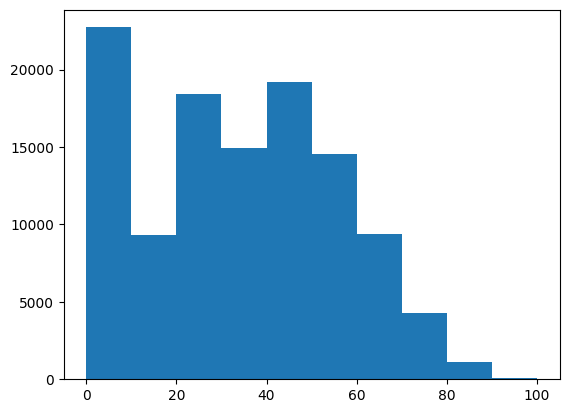

In [12]:
df.popularity.hist(grid=False)

In [13]:
df.query("popularity==100")

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
20001,20001,3nqQXoyQOWXiESFLlDF1hG,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100,156943,False,0.714,0.472,...,-7.375,1,0.0864,0.013,0.000005,0.266,0.238,131.121,4,dance
81051,81051,3nqQXoyQOWXiESFLlDF1hG,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100,156943,False,0.714,0.472,...,-7.375,1,0.0864,0.013,0.000005,0.266,0.238,131.121,4,pop


In [14]:
df.groupby('album_name').popularity.mean().sort_values(ascending=False).head(10)

album_name
Unholy (feat. Kim Petras)                                              100.0
Quevedo: Bzrp Music Sessions, Vol. 52                                   99.0
La Bachata                                                              98.0
I Ain’t Worried (Music From The Motion Picture "Top Gun: Maverick")     96.0
Indigo (Extended)                                                       96.0
RENAISSANCE                                                             93.0
PROVENZA                                                                93.0
Left and Right (Feat. Jung Kook of BTS)                                 92.0
Super Freaky Girl                                                       92.0
Calm Down (with Selena Gomez)                                           92.0
Name: popularity, dtype: float64

#### Explore Features

In [15]:
df.artists.nunique()

31437

In [16]:
# top10 artists in dataset
df.artists.value_counts(dropna=False).head(10)

artists
The Beatles        279
George Jones       271
Stevie Wonder      236
Linkin Park        224
Ella Fitzgerald    222
Prateek Kuhad      217
Feid               202
Chuck Berry        190
Håkan Hellström    183
OneRepublic        181
Name: count, dtype: int64

In [17]:
df.track_genre.nunique()

114

In [18]:
# top10 track genres in dataset
df.track_genre.value_counts(dropna=False)

track_genre
acoustic       1000
afrobeat       1000
alt-rock       1000
alternative    1000
ambient        1000
               ... 
techno         1000
turkish        1000
trip-hop       1000
world-music    1000
k-pop           999
Name: count, Length: 114, dtype: int64

In [19]:
df.album_name.nunique()

46589

In [20]:
df.album_name.value_counts(dropna=False).head(10)

album_name
Alternative Christmas 2022     195
Feliz Cumpleaños con Perreo    184
Metal                          143
Halloween con perreito         123
Halloween Party 2022           115
The Complete Hank Williams     111
Fiesta portatil                110
Frescura y Perreo              106
Esto me suena a Farra          105
Perreo en Halloween            103
Name: count, dtype: int64

In [21]:
df.track_name.nunique()

73608

In [22]:
df.track_name.value_counts(dropna=False).head(10)

track_name
Run Rudolph Run                   151
Halloween                          88
Frosty The Snowman                 81
Little Saint Nick - 1991 Remix     76
Last Last                          75
Christmas Time                     72
CÓMO SE SIENTE - Remix             64
Sleigh Ride                        61
RUMBATÓN                           60
X ÚLTIMA VEZ                       58
Name: count, dtype: int64

In [23]:
df.query("track_name == 'Run Rudolph Run'").artists.value_counts()

artists
Chuck Berry    151
Name: count, dtype: int64

In [24]:
df.query("track_name == 'Run Rudolph Run'").album_name.nunique()

40

<Axes: >

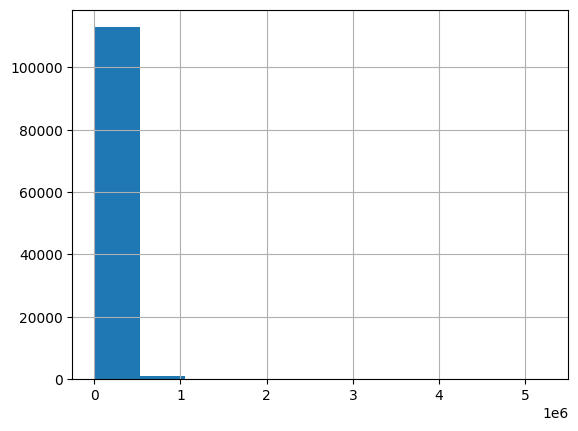

In [25]:
df.duration_ms.hist()

In [26]:
((df.duration_ms)/60000).describe()

count    113999.000000
mean          3.800519
std           1.788268
min           0.143100
25%           2.901100
50%           3.548433
75%           4.358433
max          87.288250
Name: duration_ms, dtype: float64

In [27]:
df.query("(duration_ms/60000) > 10").track_id.count()

np.int64(603)

In [28]:
df.explicit.value_counts(dropna=False)

explicit
False    104252
True       9747
Name: count, dtype: int64

<Axes: >

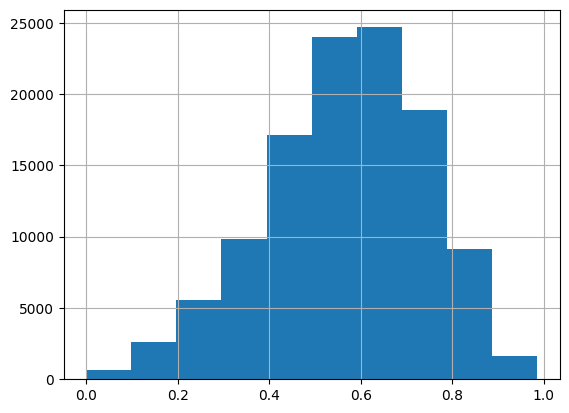

In [29]:
df.danceability.hist()

<Axes: >

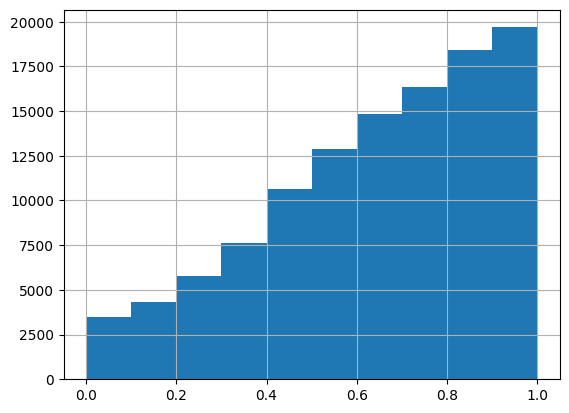

In [30]:
df.energy.hist()

<Axes: >

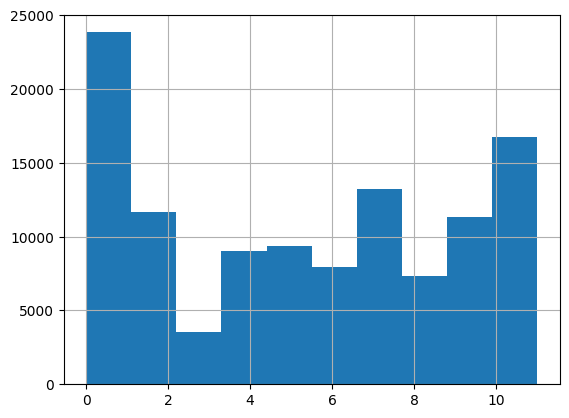

In [31]:
df.key.hist()

<Axes: >

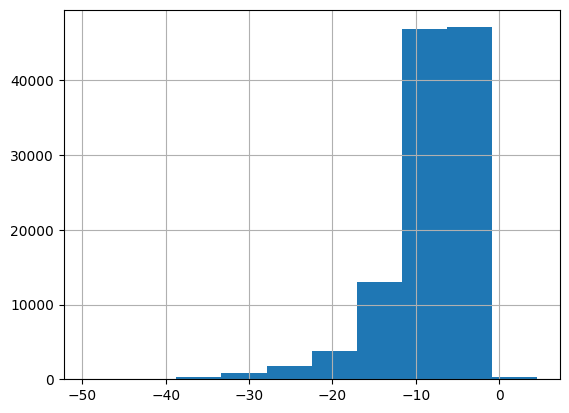

In [32]:
df.loudness.hist()

In [33]:
df['mode'].value_counts(dropna=False)

mode
1    72681
0    41318
Name: count, dtype: int64

<Axes: >

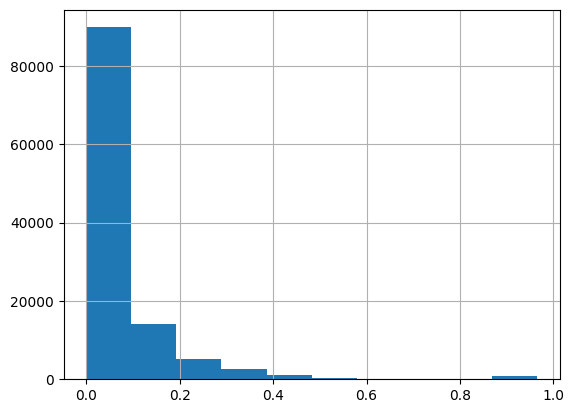

In [34]:
df.speechiness.hist()

<Axes: >

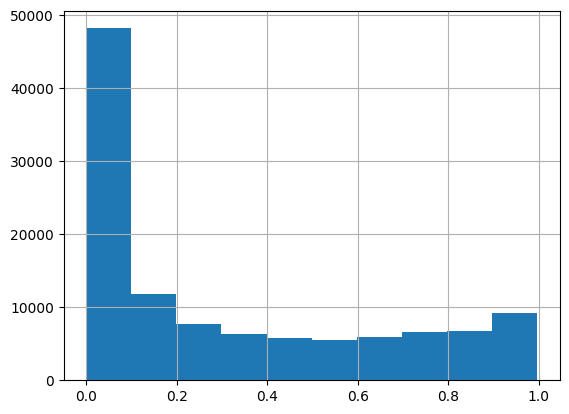

In [35]:
df.acousticness.hist()

<Axes: >

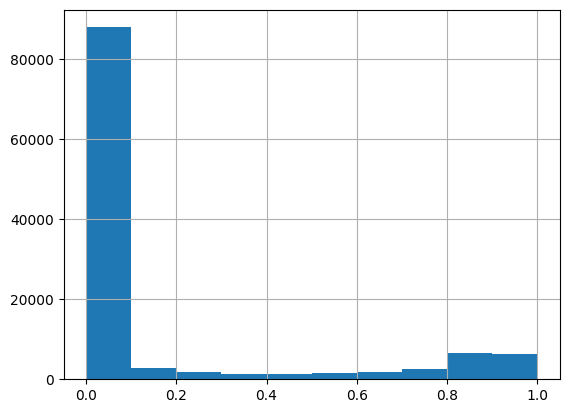

In [36]:
df.instrumentalness.hist()

<Axes: >

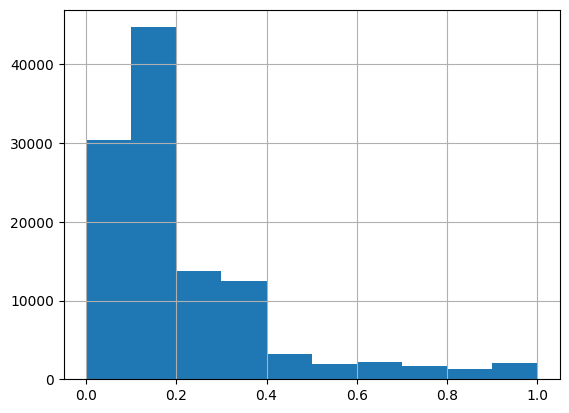

In [37]:
df.liveness.hist()

<Axes: >

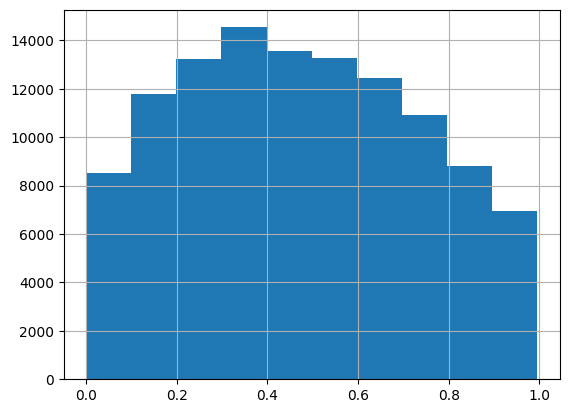

In [38]:
df.valence.hist()

<Axes: >

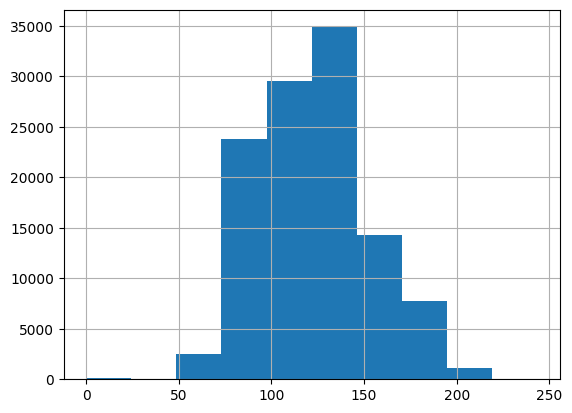

In [39]:
df.tempo.hist()

In [40]:
df.time_signature.value_counts(dropna=False)

time_signature
4    101842
3      9195
5      1826
1       973
0       163
Name: count, dtype: int64

In [41]:
df.track_genre.value_counts(dropna=False)

track_genre
acoustic       1000
afrobeat       1000
alt-rock       1000
alternative    1000
ambient        1000
               ... 
techno         1000
turkish        1000
trip-hop       1000
world-music    1000
k-pop           999
Name: count, Length: 114, dtype: int64